### COMP 6315
### Analisis Discriminante Lineal (LDA)
#### Edgar Acuna
### Septiembre 18, 2018

In [1]:
import pandas as pd
from scipy import linalg
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colors
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix

### Ejemplo 1. Prediciendo la nota final de un curso basado en la notas de Ex1 y Ex2

In [2]:
# Ejemplo1. Leyendo los datos de las notas en un curso, usando como predictoras E1 y E2
df=pd.read_csv("http://academic.uprm.edu/eacuna/eje1dis.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
E1      32 non-null int64
E2      32 non-null int64
PF      32 non-null int64
Nota    32 non-null object
dtypes: int64(3), object(1)
memory usage: 1.1+ KB


In [3]:
df.head()

E1   E2   PF Nota
0   96  100  100    p
1   96   94   99    p
2  100   91   97    p
3   93   96   97    p
4   90   94   95    p

In [4]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df['Nota']
X=df.iloc[:,0:2]
#creando una columna "pass" numerica para representar las clases
lb_make = LabelEncoder()
df["pass"] = lb_make.fit_transform(df["Nota"])
y2=df['pass']
y1=y2.as_matrix()
X1=X.as_matrix()
print y2.head()

0    1
1    1
2    1
3    1
4    1
Name: pass, dtype: int64


In [5]:
#Haciendo el analisis discriminante y calculando el porcentaje de precision
ldadis = LinearDiscriminantAnalysis().fit(X1,y1)
#Tasa de precision
ldadis.score(X1, y1)

0.9375

In [6]:
#Calculando las predicciones
pred=ldadis.predict(X1)

In [7]:
#Calculando los errores
error=(y1!=pred).sum()
print "Este es el numero de errores=", error

Este es el numero de errores= 2


In [8]:
#Calculando la matriz de confusion
confusion_matrix(y1,pred)

array([[ 8,  0],
       [ 2, 22]], dtype=int64)

In [9]:
error_rate=error*100/float(len(df))
print "la tasa de error es", error_rate

la tasa de error es 6.25


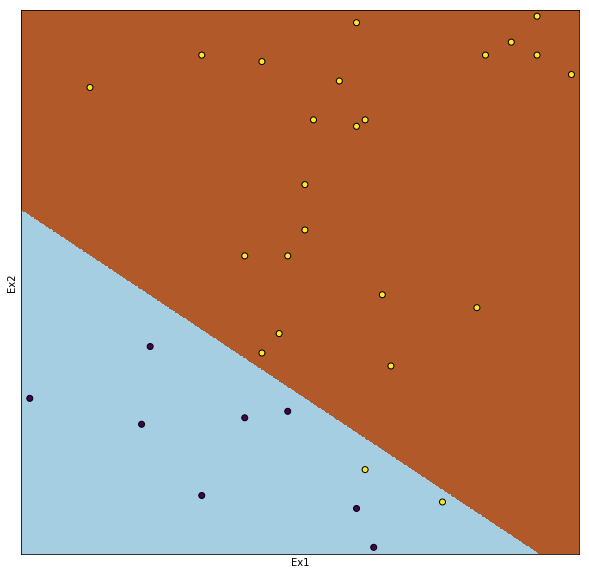

In [10]:
from matplotlib.colors import ListedColormap
ldadis = LinearDiscriminantAnalysis()
ldadis.fit(X1,y1)
eje1=np.arange(start = X1[:, 0].min()-1, stop = X1[:, 0].max() + 1, step = 0.1)
eje2=np.arange(start = X1[:, 1].min()-1, stop = X1[:, 1].max() + 1, step = 0.11)
Y1, Y2 = np.meshgrid(eje1,eje2)
pred2=ldadis.predict(np.c_[Y1.ravel(), Y2.ravel()]).reshape(Y1.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(Y1, Y2, pred2,cmap=plt.cm.Paired)
# Plot also the training points#
plt.scatter(X1[:, 0], X1[:, 1], c=y2, edgecolors='k')
plt.xlabel('Ex1')
plt.ylabel('Ex2')
plt.xlim(Y1.min(), Y1.max())
plt.ylim(Y2.min(), Y2.max())
plt.xticks(())
plt.yticks(())

plt.show()

### Ejemplo 2: LDA pra el conjunto de datos vehicle

In [11]:
#Ejemplo2. Leyendo los datos de vehiculos que tienen 4 clases y 18 predictoras
df1=pd.read_csv("http://academic.uprm.edu/eacuna/vehicle.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
V1       846 non-null int64
V2       846 non-null int64
V3       846 non-null int64
V4       846 non-null int64
V5       846 non-null int64
V6       846 non-null int64
V7       846 non-null int64
V8       846 non-null int64
V9       846 non-null int64
V10      846 non-null int64
V11      846 non-null int64
V12      846 non-null int64
V13      846 non-null int64
V14      846 non-null int64
V15      846 non-null int64
V16      846 non-null int64
V17      846 non-null int64
V18      846 non-null int64
class    846 non-null int64
dtypes: int64(19)
memory usage: 125.6 KB


In [12]:
#Convirtiendo en matriz la tabla de predictoras y la columna de clases
y=df1['class']
X=df1.iloc[:,0:18]
y1=y.as_matrix()
X1=X.as_matrix()

In [13]:
#Haciendo el analisis discriminante y calculando el porcentaje de precision
ldadis = LinearDiscriminantAnalysis().fit(X1,y1)
#Tasa de precision
ldadis.score(X1, y1)

0.7978723404255319

In [14]:
#Calculando las predicciones
pred=ldadis.predict(X1)

In [15]:
confusion_matrix(y1,pred)

array([[211,   4,   0,   3],
       [  7, 133,  66,   6],
       [ 11,  57, 139,  10],
       [  2,   3,   2, 192]], dtype=int64)

### Ejemplo 3. LDA para el conjunto de datos Diabetes

In [16]:
url= "http://academic.uprm.edu/eacuna/diabetes.dat"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_table(url, names=names,header=None)
y=data['class']
X=data.iloc[:,0:8]
#Haciendo el analisis discriminante y calculando el porcentaje de precision
ldadis = LinearDiscriminantAnalysis().fit(X,y)
#Tasa de precision
ldadis.score(X, y)

0.78385416666666663